### Oscillation analysis with oscillated backgrounds

This notebook performs and plots the results of our oscillation analysis for MicroBooNE.
We work with appearance only, and fix the oscillation backgrounds.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from MicroTools import *
from MicroTools.plot_tools import *

In [3]:
MuBAppDisT0 = np.load(f"{path_osc_app}/FullAnalysis_AppDis_SSq2EE_SSq2MM.npy", allow_pickle=True)
PVs = np.load(f"{path_osc_app}/Dm41_SSq2EE_SSq2MM_PVs.npy", allow_pickle=True)
dm41VecT = PVs[0]
EVec = PVs[1]
MVec = PVs[2]

MuBAppDisT = (np.asarray(MuBAppDisT0.T[0])).reshape(len(dm41VecT), len(EVec), len(MVec))
MuBAppDisTAs = (np.asarray(MuBAppDisT0.T[1])).reshape(len(dm41VecT), len(EVec), len(MVec))

In [4]:
MargM = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Um4SqII in range(len(MVec))]) for Ue4SqII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
MargE = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Ue4SqII in range(len(EVec))]) for Um4SqII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

def FixUm4T(MII):
    return [[MuBAppDisT[dm41II][EII][MII] for EII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
def FixUe4T(EII):
    return [[MuBAppDisT[dm41II][EII][MII] for MII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

In [5]:
MargMAs = [[np.min([MuBAppDisTAs[dm41II][Ue4SqII][Um4SqII] for Um4SqII in range(len(MVec))]) for Ue4SqII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
MargEAs = [[np.min([MuBAppDisTAs[dm41II][Ue4SqII][Um4SqII] for Ue4SqII in range(len(EVec))]) for Um4SqII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

def FixUm4TAs(MII):
    return [[MuBAppDisTAs[dm41II][EII][MII] for EII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
def FixUe4TAs(EII):
    return [[MuBAppDisTAs[dm41II][EII][MII] for MII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

In [6]:
MINOS = np.loadtxt(f"{path_osc_numudis}/MINOSPlus_90CL.csv", delimiter=",")
MINOSX = [4.0*mi*(1.0 - mi) for mi in np.transpose(MINOS)[0]]

IceCube = np.loadtxt(f"{path_osc_numudis}/IceCube_99CL.csv", delimiter=",")
IceCube90 = np.loadtxt(f"{path_osc_numudis}/IceCube_90CL.csv", delimiter=",")

Ga2S0 = np.loadtxt(f"{path_osc_nuedis}/Gallium_2sigma_l0.csv", delimiter=",")
Ga2S1 = np.loadtxt(f"{path_osc_nuedis}/Gallium_2sigma_l1.csv", delimiter=",")

RX0 = np.loadtxt(f"{path_osc_nuedis}/Reactor_Spectra_Total.dat")
RXX = 10**np.unique(RX0.T[0])
RXY = 10**np.unique(RX0.T[1])
RXZ = (RX0.T[2]).reshape(len(RXX), len(RXY))

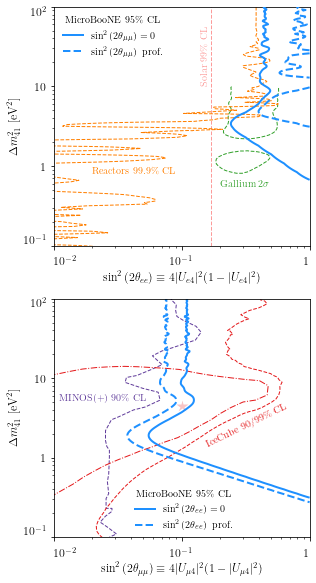

In [32]:
from MicroTools.plot_tools import *


fig, axes = double_axes_fig(figsize=(std_figsize[0], std_figsize[1]*1.5*2), split_y=True,  gap=0.08)
xmin, xmax, ymin, ymax = 1e-2, 1, 1e-1, 1e2

ax1, ax2 = axes
for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        
    ax.xaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1)))
    ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100)))
    [l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
    [l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
    [l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
    ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)
    ax.set_xticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)

    
ax1.set_xlabel(r"$\sin^2\left(2\theta_{ee}\right)\equiv 4|U_{e 4}|^2 (1 - |U_{e 4}|^2)$", fontproperties=font)        
ax2.set_xlabel(r"$\sin^2\left(2\theta_{\mu\mu}\right) \equiv 4|U_{\mu 4}|^2 (1 - |U_{\mu 4}|^2)$", fontproperties=font)        

#######
# nue dis
levsT2 = [np.min(MargM)+5.99]
ax1.contour(EVec, dm41VecT, MargM, levels=levsT2, colors=['dodgerblue'], linestyles=['--'], linewidths=[2], zorder=20)
ch2AltM = FixUm4T(0)
levsT2 = [np.min(ch2AltM) + 5.99]
ax1.contour(EVec, dm41VecT, ch2AltM, levels=levsT2, colors=['dodgerblue'], linestyles=['-'], linewidths=[2], zorder=20)

ax1.plot(Ga2S0.T[0], Ga2S0.T[1], lw=1, color=grncol, ls='--', zorder=0)
ax1.plot(Ga2S1.T[0], Ga2S1.T[1], lw=1, color=grncol, ls='--', zorder=0)
ax1.plot([0.1704, 0.1704], [ymin, ymax], lw=1, color=pinkcol, ls='--', zorder=0)
ax1.contour(RXX, RXY, RXZ.T, levels=[np.min(RXZ) + 13.8], colors=orcol, linestyles=['--'], linewidths=1, zorder=0)

ax1.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='-', label=r"$\sin^2\left(2\theta_{\mu\mu}\right) = 0$")
ax1.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='--', label=r"$\sin^2\left(2\theta_{\mu\mu}\right)\ \mathrm{prof.}$")
ax1.legend(loc=2, title=r"MicroBooNE $95\%$ CL", fontsize = fsize_annotate, framealpha=1.0)

keyargs = {'textcoords': "data", 'ha': "left", 'va':"bottom", 'size': fsize_annotate}
ax1.annotate(r"\noindent Gallium $2\sigma$", xy=(0.2, 0.5), color=grncol, **keyargs)
ax1.annotate(r"Solar $99\%$ CL", xy=(1.4e-1, 10), color=pinkcol, rotation=90, **keyargs)
ax1.annotate(r"Reactors $99.9\%$ CL", xy=(0.02, 0.75), color=orcol, **keyargs)
flushalign(ax1)


#######
# muon dis

levsT = [np.min(MargE) + 5.99]
ax2.contour(MVec, dm41VecT, MargE, levels=levsT, colors=['dodgerblue'], linestyles=['--'], linewidths=[2])
ch2AltE = FixUe4T(0)
levsT2 = [np.min(ch2AltE) + 5.99]
ax2.contour(MVec, dm41VecT, ch2AltE, levels=levsT2, colors=['dodgerblue'], linestyles=['-'], linewidths=[2])

ax2.plot(MINOSX, MINOS.T[1], color=purcol, lw=1, ls='--', zorder=0)
ax2.plot(IceCube.T[0], IceCube.T[1], color=redcol, lw=1, ls='--', zorder=0)
ax2.plot(IceCube90.T[0], IceCube90.T[1], color=redcol, lw=1, ls='-.', zorder=0)
ax2.plot([0.1], [4.5], lw=0, markersize=12, marker='*', markerfacecolor=redcol, markeredgecolor="None", zorder=0, alpha=0.25)

keyargs = {'textcoords': "data", 'ha': "left", 'va':"bottom", 'size': fsize_annotate}
ax2.annotate(r"$\mathrm{MINOS({+})\ 90\%\ CL}$", xy=(0.011, 4.75), color=purcol, **keyargs)
ax2.annotate(r"$\mathrm{IceCube\ 90/99\%\ CL}$", xy=(0.15, 1.25), color=redcol, rotation=26, **keyargs)

ax2.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='-', label=r"$\sin^2\left(2\theta_{ee}\right) = 0$")
ax2.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='--', label=r"$\sin^2\left(2\theta_{ee}\right)\ \mathrm{prof.}$")
leg = ax2.legend(loc=(0.3,0.01), frameon= False, fontsize = fsize_annotate, title=r"MicroBooNE $95\%$ CL", framealpha=1.0, )
# leg.get_frame().set_linewidth(0.5)

flushalign(ax2)

fig.savefig(f"{path_plots}/Fig4_v2.pdf", bbox_inches='tight')


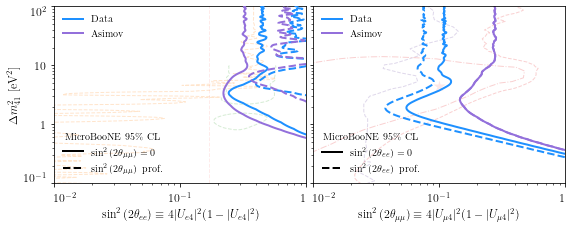

In [33]:

from MicroTools.plot_tools import *

fig, axes = double_axes_fig(split_x=True, figsize=(std_figsize[0]*2, std_figsize[1]), gap=0.01)
xmin, xmax, ymin, ymax = 1e-2, 1, 1e-1, 1e2

ax1, ax2 = axes
for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.xaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1)))
    ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100)))
    [l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
    [l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
    [l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
    ax.set_xticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)
ax1.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        
ax1.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)
ax2.set_yticklabels(())

ax1.set_xlabel(r"$\sin^2\left(2\theta_{ee}\right)\equiv 4|U_{e 4}|^2 (1 - |U_{e 4}|^2)$", fontproperties=font)        
ax2.set_xlabel(r"$\sin^2\left(2\theta_{\mu\mu}\right) \equiv 4|U_{\mu 4}|^2 (1 - |U_{\mu 4}|^2)$", fontproperties=font)        

    
#######
# Nue dis  
levsT2 = [np.min(MargM)+5.99]
ax1.contour(EVec, dm41VecT, MargM, levels=levsT2, colors=['dodgerblue'], linestyles=['--'], linewidths=[2], zorder=20)
ch2AltM = FixUm4T(0)
levsT2 = [np.min(ch2AltM) + 5.99]
ax1.contour(EVec, dm41VecT, ch2AltM, levels=levsT2, colors=['dodgerblue'], linestyles=['-'], linewidths=[2], zorder=20)
levsT2As = [np.min(MargMAs)+5.99]
ax1.contour(EVec, dm41VecT, MargMAs, levels=levsT2As, colors=['mediumpurple'], linestyles=['--'], linewidths=[2], zorder=20)
ch2AltMAs = FixUm4TAs(0)
levsT2As = [np.min(ch2AltMAs) + 5.99]
ax1.contour(EVec, dm41VecT, ch2AltMAs, levels=levsT2As, colors=['mediumpurple'], linestyles=['-'], linewidths=[2], zorder=20)

ax1.plot(Ga2S0.T[0], Ga2S0.T[1], lw=1, color=grncol, ls='--', zorder=0, alpha=0.2)
ax1.plot(Ga2S1.T[0], Ga2S1.T[1], lw=1, color=grncol, ls='--', zorder=0, alpha=0.2)
ax1.plot([0.1704, 0.1704], [ymin, ymax], lw=1, color=pinkcol, ls='--', zorder=0, alpha=0.2)
ax1.contour(RXX, RXY, RXZ.T, levels=[np.min(RXZ) + 13.8], colors=orcol, linestyles=['--'], linewidths=1, zorder=0, alpha=0.2)

h = []
h.append(plt.plot([], [], color='dodgerblue', ls='-', lw=2)[0])
h.append(plt.plot([], [], color='mediumpurple', ls='-', lw=2)[0])
leg2 = ax1.legend(handles=h, labels=[r"$\mathrm{Data}$", r"$\mathrm{Asimov}$"], fontsize=fsize_annotate, framealpha=1.0, loc=2)
ax1.add_artist(leg2)

ax1.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='-', label=r"$\sin^2\left(2\theta_{\mu\mu}\right) = 0$")
ax1.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='--', label=r"$\sin^2\left(2\theta_{\mu\mu}\right)\ \mathrm{prof.}$")
ax1.legend(loc=3, fontsize=fsize_annotate, title=r"$\mathrm{MicroBooNE\ 95\%\ CL}$", framealpha=1.0)
flushalign(ax1)

#######
# Numu dis
levsT = [np.min(MargE) + 5.99]
ax2.contour(MVec, dm41VecT, MargE, levels=levsT, colors=['dodgerblue'], linestyles=['--'], linewidths=[2])
ch2AltE = FixUe4T(0)
levsT2 = [np.min(ch2AltE) + 5.99]
ax2.contour(MVec, dm41VecT, ch2AltE, levels=levsT2, colors=['dodgerblue'], linestyles=['-'], linewidths=[2])

levsTAs = [np.min(MargEAs) + 5.99]
ax2.contour(MVec, dm41VecT, MargEAs, levels=levsTAs, colors=['mediumpurple'], linestyles=['-'], linewidths=[2])
ch2AltEAs = FixUe4TAs(0)
levsT2As = [np.min(ch2AltEAs) + 5.99]
ax2.contour(MVec, dm41VecT, ch2AltEAs, levels=levsT2As, colors=['mediumpurple'], linestyles=['--'], linewidths=[2])

ax2.plot(MINOSX, MINOS.T[1], color=purcol, lw=1, ls='--', zorder=0, alpha=0.2)
ax2.plot(IceCube.T[0], IceCube.T[1], color=redcol, lw=1, ls='--', zorder=0, alpha=0.2)
ax2.plot(IceCube90.T[0], IceCube90.T[1], color=redcol, lw=1, ls='-.', zorder=0, alpha=0.2)
ax2.plot([0.1], [4.5], lw=0, markersize=12, marker='*', markerfacecolor=redcol, markeredgecolor="None", zorder=0, alpha=0.1)

h = []
h.append(plt.plot([], [], color='dodgerblue', ls='-', lw=2)[0])
h.append(plt.plot([], [], color='mediumpurple', ls='-', lw=2)[0])
leg2B = ax2.legend(handles=h, labels=[r"$\mathrm{Data}$", r"$\mathrm{Asimov}$"], fontsize=fsize_annotate, framealpha=1.0, loc=2)
ax2.add_artist(leg2B)

ax2.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='-', label=r"$\sin^2\left(2\theta_{ee}\right) = 0$")
ax2.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='--', label=r"$\sin^2\left(2\theta_{ee}\right)\ \mathrm{prof.}$")
leg = ax2.legend(loc=3, title=r"$\mathrm{MicroBooNE\ 95\%\ CL}$", fontsize=fsize_annotate, framealpha=1.0)
flushalign(ax2)

fig.savefig(f"{path_plots}/FigSupppl_2_v2.pdf", bbox_inches='tight')

